In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', parse_dates=True)

In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
# Какой клиент совершил больше всего успешных операций?

# Если несколько пользователей совершили одинаковое число успешных действий, 
# перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.
# Мое решение:

success_clients = logs.query('success == True') \
    .groupby('client', as_index=False) \
     .agg({'success': 'count'}) \
     .sort_values('success', ascending=False) \
     .query('success == 41') \
     .sort_values('client')

In [6]:
success_clients['client'].tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [7]:
#другой вариант
success_number = logs.query('success == True') \
    .groupby('client', as_index=False) \
     .agg({'success': 'count'}) \
     .sort_values('success', ascending=False)

In [8]:
max_success_number = success_number.success.max()

In [9]:
success_number.query('success == @max_success_number')

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [10]:
success_clients_result = (success_number[success_number['success'] == max_success_number].sort_values('client')).client.tolist()

In [11]:
success_clients_result

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [12]:
str1 = ', '.join(str (e) for e in success_clients_result)

In [13]:
str1

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [14]:
for client in success_clients_result:
    print(client, end=' ')

12179 28719 36165 52870 61468 61473 78349 82563 92584 

In [15]:
#третий вариант (Суммировать по success, суммируются только True, т.к. они = 1)
success_number_2 = logs \
    .groupby('client', as_index=False) \
    .agg({'success': 'sum'}) \
    .sort_values('success', ascending=False)

In [16]:
success_number_2

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [17]:
success_max_value = success_number_2.success.max()

In [18]:
success_number_2.client[success_number_2.client == success_max_value]

Series([], Name: client, dtype: int64)

In [19]:
success_list = success_number_2.query('success == @success_max_value') \
    .sort_values('client') \
    .client.tolist()

In [20]:
success_result = ', '.join(str(client) for client in success_list)

In [21]:
success_result

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [22]:
#С какой платформы было совершено наибольшее количество успешных операций?
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [23]:
logs.groupby('platform') \
    .agg({'success': 'sum'})

,success
platform,
computer,1090
phone,2019
tablet,180


In [24]:
logs \
    .query('success == True') \
    .groupby('platform') \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False)

,success
platform,
phone,2019
computer,1090
tablet,180


In [25]:
#Какую платформу предпочитают премиальные клиенты?
logs.head()


,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [26]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [27]:
logs_with_status = logs.merge(user_data, how='inner', on='client')

In [28]:
logs_with_status

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [29]:
logs_with_status.query('premium == True') \
    .groupby('platform') \
    .agg({'client': 'count'}) \
    .sort_values('client')

,client
platform,
tablet,24
computer,150
phone,246


In [30]:
logs_with_status \
    .query('premium == True') \
    .platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

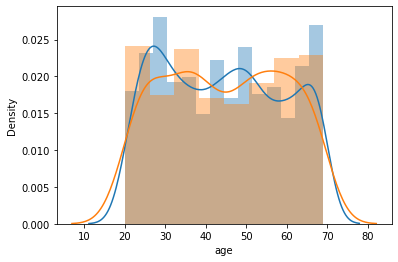

In [31]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента
# (премиум или нет), используя библиотеку seaborn с исходными параметрами.
# Какой график получится в результате?

# Используйте датасет, который вы получили на предыдущем шаге.
sns.distplot(logs_with_status.query('premium == False').age)
sns.distplot(logs_with_status.query('premium == True').age)

In [33]:
success_by_client = logs_with_status \
    .groupby('client') \
    .agg({'success': 'sum'}) \
    .sort_values('success', ascending=False)

In [34]:
success_by_client

,success
client,
82563,41
61468,41
61473,41
52870,41
92584,41
...,...
76661,0
76712,0
76732,0


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

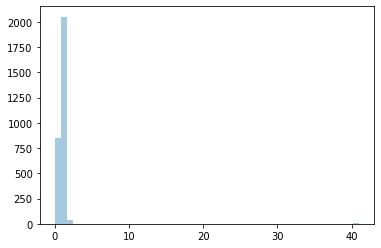

In [35]:
# Постройте график распределения числа успешных операций: 

# x – число успешных операций
# y – число клиентов, совершивших такое количество успешных операций

sns.distplot(success_by_client, kde=False)

In [36]:
success_by_client.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

In [38]:
# Визуализируйте число успешных операций, сделанных на платформе computer,
# в зависимости от возраста, используя sns.countplot. По оси x – возраст,
# по оси y – число успешных операций.
# Если размер графика получается небольшим,
# можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

logs_with_status.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [56]:
success_computer = logs_with_status.query('platform == "computer" and success == True') \
    .age.value_counts() \
    .sort_values()

In [71]:
success_computer = logs_with_status.query('platform == "computer" and success == True') \
    .groupby('age', as_index=False) \
    .agg({'success': 'count'})

In [78]:
success_computer_2 = logs_with_status.query('platform == "computer" and success == True')

In [72]:
success_computer.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot:xlabel='age', ylabel='success'>

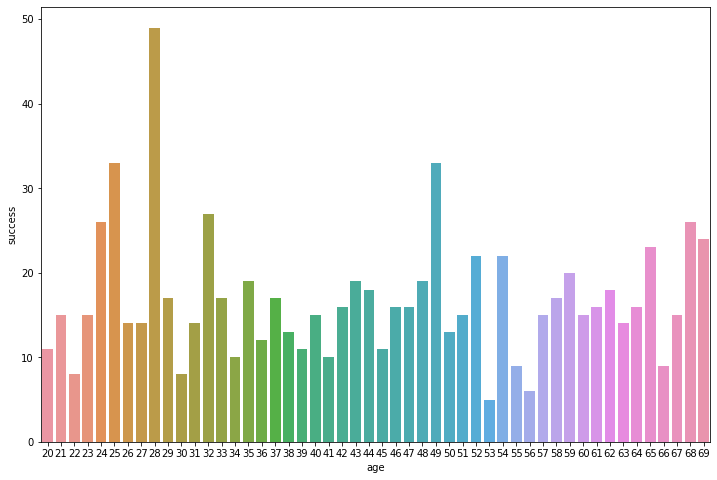

In [77]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='success', data=success_computer)

In [79]:
success_computer_2

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


<AxesSubplot:xlabel='age', ylabel='count'>

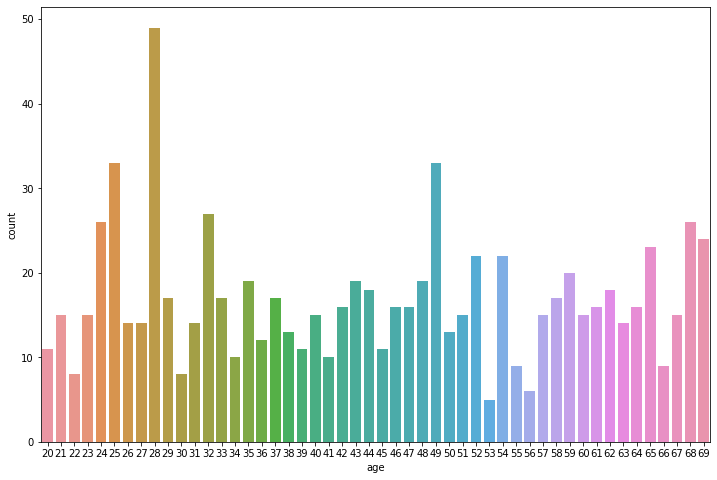

In [80]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data=success_computer_2)